In [1]:
import xarray as xr
import pyorc
from matplotlib.colors import Normalize

In [3]:
ds = xr.open_dataset(R"./artifact/mask.nc")
video_file = R"..\..\res\pont-cour.mp4"

Scanning video: 100%|██████████| 107/107 [00:01<00:00, 96.91it/s]


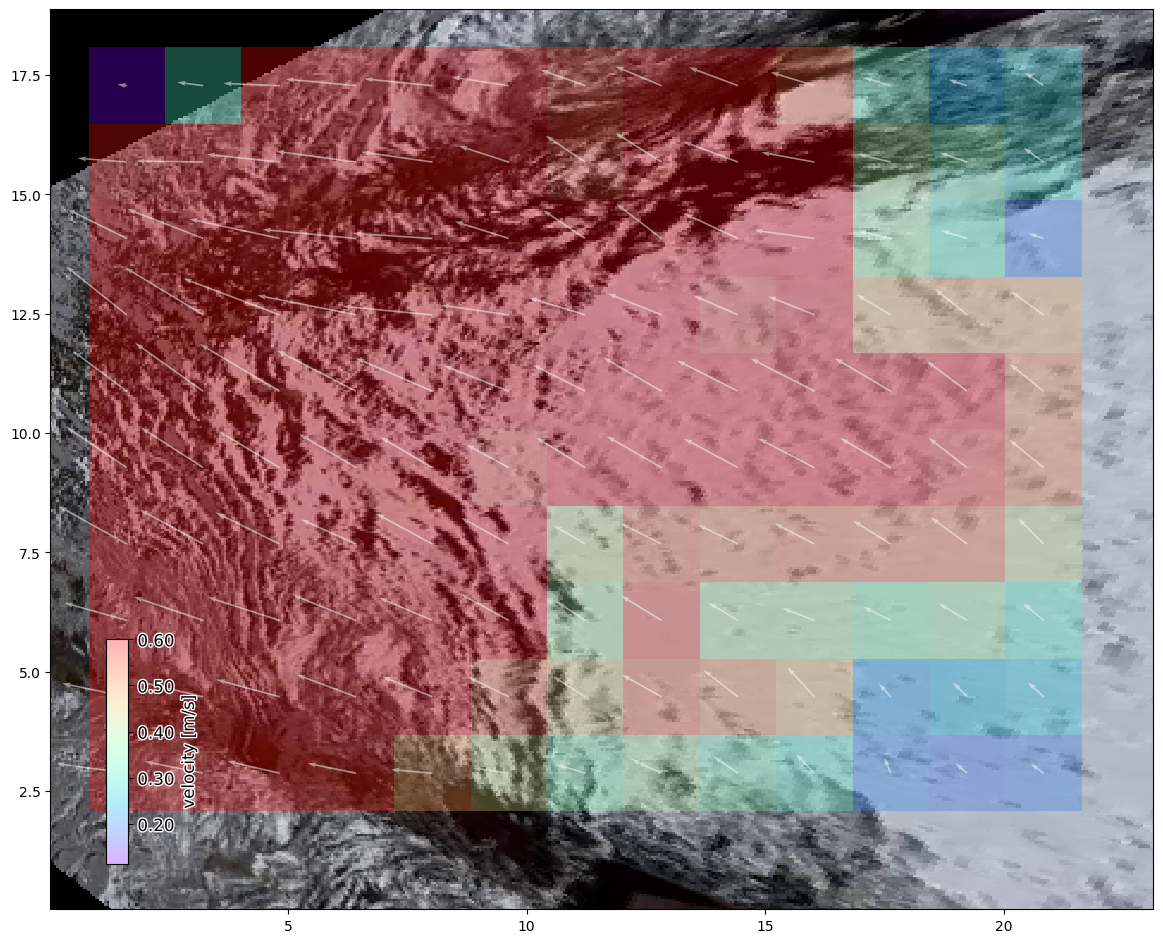

In [4]:
video = pyorc.Video(video_file, start_frame=0, end_frame=125)
video.camera_config = ds.velocimetry.camera_config

da_rgb = video.get_frames(method="rgb")
# project the rgb frame
da_rgb_proj = da_rgb.frames.project()
# plot the first frame (we only have one) without any arguments, default is to use "local" mode
p = da_rgb_proj[0].frames.plot()

ds_mean = ds.mean(dim="time", keep_attrs=True)

ds_mean.velocimetry.plot.pcolormesh(
    ax=p.axes,
    alpha=0.3,
    cmap="rainbow",
    add_colorbar=True,
    vmax=0.6
)

ds_mean.velocimetry.plot(
    ax=p.axes,
    color="w",
    alpha=0.5,
    width=0.0015,
)

In [ ]:
# apply all methods in time domain with relaxed angle masking
import numpy as np
import copy
ds_mask2 = copy.deepcopy(ds)
ds_mask2.velocimetry.mask.corr(inplace=True)
ds_mask2.velocimetry.mask.minmax(inplace=True)
ds_mask2.velocimetry.mask.rolling(inplace=True)
ds_mask2.velocimetry.mask.outliers(inplace=True)
ds_mask2.velocimetry.mask.variance(inplace=True)
ds_mask2.velocimetry.mask.angle(angle_tolerance=0.5*np.pi)
ds_mask2.velocimetry.mask.count(inplace=True)
ds_mask2.velocimetry.mask.window_mean(wdw=2, inplace=True, tolerance=0.5, reduce_time=True)

# Now first average in time before applying any filter that only works in space.
ds_mean_mask2 = ds_mask2.mean(dim="time", keep_attrs=True)



# apply the plot again
# again the rgb frame first
p = da_rgb_proj[0].frames.plot()

#...and then filtered velocimetry
ds_mean_mask2.velocimetry.plot(
    ax=p.axes,
    alpha=0.4,
    cmap="rainbow",
    scale=20,
    width=0.0015,
    norm=Normalize(vmax=0.6, clip=False),
    add_colorbar=True
)